Name: Curtis Bovell 

Date: March 30, 2023

# About Me: 

I am a 2nd year economic student at the University of Waterloo, and on my journey to become a Data Scientist for my future career. I know Python, R, MYSQL, Tableau, and Excel. Currently, I have an interest in learning more machine learning and deep learning models to implement into new projects I develop. 

Additional information on me: 
- University Track Athlete 
- Governance Analyst at the OLG for my first co-op
- Love Reading and writing 
- technical analysis and fundemental analysis for stocks

I hope to develop and become better! So enjoy my projects, be sure to visit my LinkedIn down below as well. 

- LinkedIn: https://www.linkedin.com/in/cbovell/
- Email: bovell14@gmail.com 

# Project Overview

- Overview of the project: In this project, we will analyze the "Students Performance in Exams" dataset to identify factors that impact student performance in exams.

- Motivation behind the project: Understanding factors that impact student performance can help educators identify areas where students need additional support and improve their academic outcomes.

- Objectives of the project: Our objectives are to analyze the dataset using statistical and machine learning techniques to identify key factors that influence student performance.

# Dataset

Kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

# Motivation Behind The Project:

Understanding factors that impact student performance can help educators identify areas where students need additional support and improve their academic outcomes.

## OUTLINE FOR THE PROJECT INCLUDES:


# Data Collection and Preprocessing

- Description of the "Students Performance in Exams" dataset: This is a dataset of student performance in math, reading, and writing exams, along with demographic and other factors that may impact student performance.
- Downloading the dataset from Kaggle: We will obtain the dataset from the Kaggle website.
- Exploring the dataset: We will examine the structure of the data, identify missing values, and perform data cleaning and feature engineering as necessary.
- Handling missing and duplicate data: We will use various methods to handle missing and duplicate data, such as dropping rows, filling in missing values, and removing duplicate entries.
- Handling outliers: We will examine the distribution of data and use methods such as z-score or Tukey's method to identify and remove outliers.
- Converting data into the appropriate format: We will transform categorical variables into numerical variables and convert data into the appropriate data types for analysis.

# Descriptive Statistics
- Mean, Median, Mode: Calculate the measures of central tendency to describe the distribution of the data.
- Range, Variance, Standard Deviation: Calculate the measures of dispersion to describe the spread of the data.
- Skewness, Kurtosis: Calculate the measures of shape to describe the symmetry and peakedness of the distribution of the data.
- Percentiles, Quartiles: Calculate the measures of position to describe the location of the data relative to the rest of the - data.

# Visualization
- Scatter plots
- Bar charts
- Heat maps

# Conclusion
- Summarize the findings of the analysis
- Discuss the potential impact of the project 
- Identify areas for future work and improvements

# Data Collection and Preprocessing

In [5]:
# Import libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

sns_color= sns.color_palette()
plt.style.use('fivethirtyeight')


In [6]:
# Import dataset into jupyter notebook
df = pd.read_csv("C:/Users/bovel/Downloads/archive (1) 2/StudentsPerformance.csv")

In [7]:
#  Observe the first five rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# Observe the last five rows 
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [9]:
# Information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<AxesSubplot:>

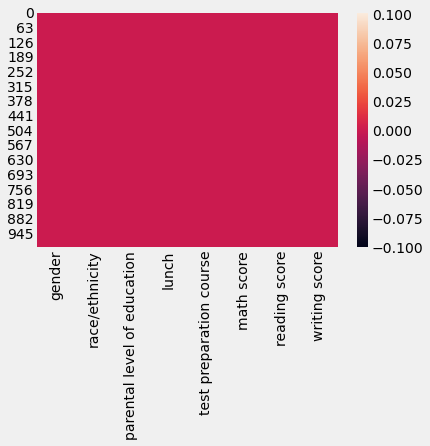

In [10]:
# Check for null
sns.heatmap(df.isnull())

In [11]:
# Check for any duplicates 
df.duplicated().sum()

0

In [12]:
# statistics of each score column; this will be very important to the performance that the students are at
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploratory Data Analysis

Questions we can solve to understand and find new things in our data our:

    - Who has the highest test scores and who has the lowest? what do they have in common?
    - Which race is the smartest? What makes them stand out from other groups 
    - The average test score by parental level of education?
    - Create a new column that only takes individuals who have a passing grade of over 50
    - See the correlation between test preparation, eating lunch and their grade

In [13]:
# Top 5 smartest individuals 
df.sort_values(by=['math score', 'reading score','writing score'], ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
625,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23


We can't pick the smartest person because the top 3 students have the same scores. These students are 458, 916, 962. 
I realized that these students are:

- from the same race 
- had lunch 
- have some type of degree from a secondary school. 

These are interesting insights. 

In [14]:
# Let's observe if group E has the smartest students out of the whole dataset 
df.groupby(df['race/ethnicity']).max()[['math score', 'reading score','writing score']]

,math score,reading score,writing score
race/ethnicity,,,
group A,100,100,97
group B,97,97,96
group C,98,100,100
group D,100,100,100
group E,100,100,100


Therefore, group D and group E have the highest scores out of all of the races.

In [15]:
# Top 5 individuals with the lowest score
df.sort_values(by=['math score', 'reading score','writing score'], ascending=True).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23
17,female,group B,some high school,free/reduced,none,18,32,28
787,female,group B,some college,standard,none,19,38,32
145,female,group C,some college,free/reduced,none,22,39,33


Some insights we can gather from this new information are:

    - All of the students are female
    - Majority of the indivduals had free lunch 
    - Majority of the students did not prepare for the test 

In [16]:
# The average test score by parental level of education
df.groupby(df['parental level of education']).max()[['math score', 'reading score','writing score']]

,math score,reading score,writing score
parental level of education,,,
associate's degree,100,100,100
bachelor's degree,100,100,100
high school,99,99,100
master's degree,95,100,100
some college,100,100,99
some high school,97,100,100


In [19]:
df_dumb.columns

Index(['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

<AxesSubplot:>

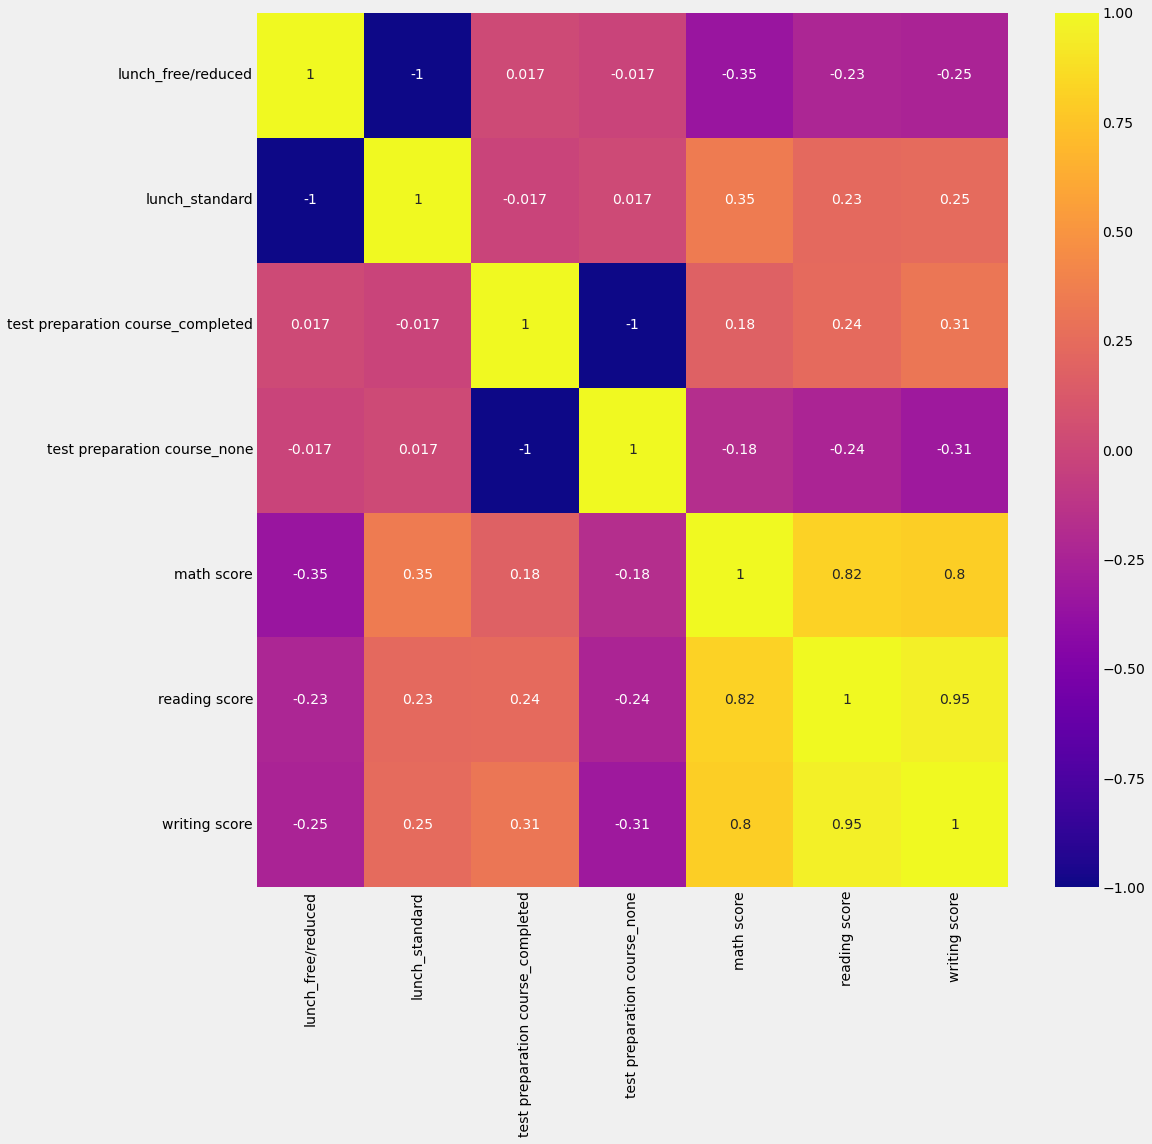

In [20]:
# Finding the correlation between all the columns to see what connections we can make or further observations 
corre=df_dumb[['lunch_free/reduced','lunch_standard', 'test preparation course_completed','test preparation course_none', "math score", "reading score", "writing score"]].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corre, cmap='plasma',annot=True)

By looking at the matrix, having a standard lunch and a test prep course completed have a greater correlation to the student's performance. These are some factors that can impact the student. 

In [21]:
# the different columns and indexes
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Let's do some more exploring of the dataset before we handle outliers and change our categorical values to numerical for further calculation

<AxesSubplot:>

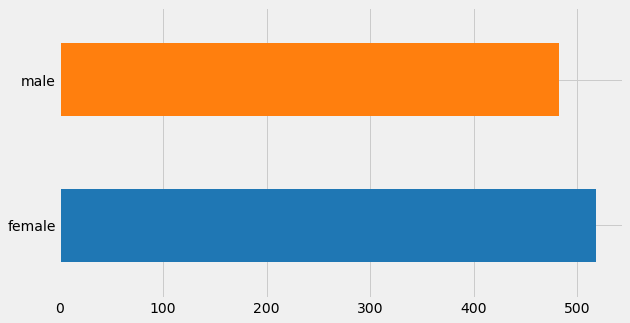

In [22]:
plt.subplots(figsize=(9,5))
df['gender'].value_counts().plot(kind='barh', color=sns_color)

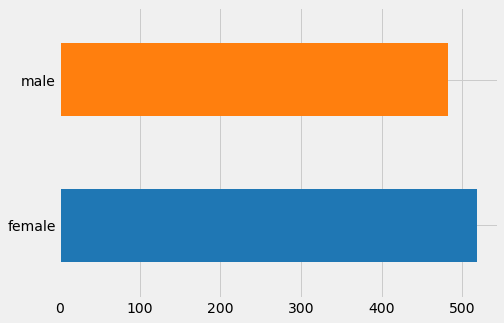

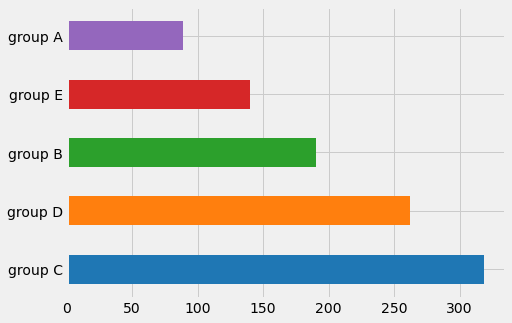

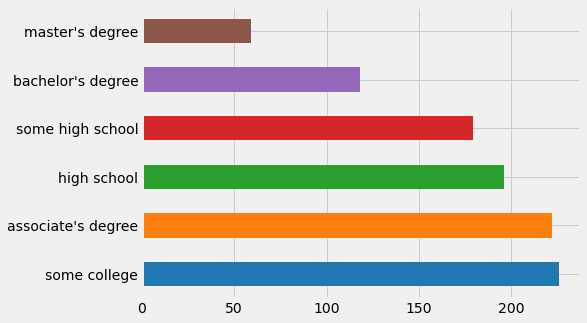

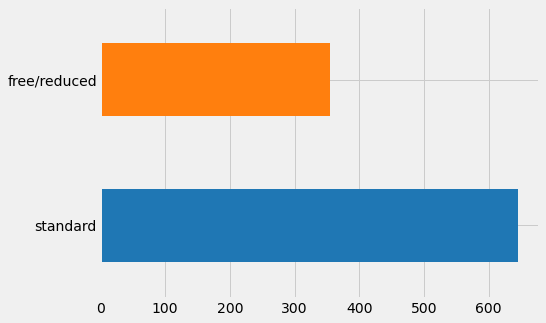

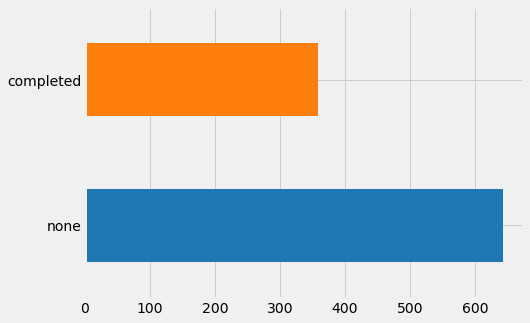

In [23]:
# Do a for loop for the following column to show how much for each distribution
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']

for i, col in enumerate(columns):
    plt.subplots(figsize=(7,5))
    df[col].value_counts().plot(kind='barh', color=sns_color)
    plt.show()

Find the outliers and remove them from the dataset. They represent measurement errors, data entry or processing errors, or poor sampling.

In [24]:
# Compute the zscore for each of the score columns
z_score = np.abs(stats.zscore(df[['math score', 'reading score','writing score']]))

# Outliers usually occur beyond 3 std deviations 
outliers = np.where(z_score > 3)

# Remove all the outliers using the z score method 
df = df[((z_score < 3).all(axis=1))]

Convert the categorical results into numerical values so that we can do calculations

In [18]:
df_dumb = pd.get_dummies(data=df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

In [25]:
# Check the first five rows 
df_dumb.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


# Descriptive Statistics

In [26]:
# shows the mean, the quartiles for each of the columns, and the variances  
df_dumb.describe()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.518000,0.482000,0.089000,0.190000,0.319000,0.262000,0.140000,0.222000,0.11800,0.196000,0.059000,0.226000,0.179000,0.355000,0.645000,0.358000,0.642000
std,15.16308,14.600192,15.195657,0.499926,0.499926,0.284886,0.392497,0.466322,0.439943,0.347161,0.415799,0.32277,0.397167,0.235743,0.418448,0.383544,0.478753,0.478753,0.479652,0.479652
min,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.00000,59.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.00000,70.000000,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,77.00000,79.000000,79.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,100.00000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


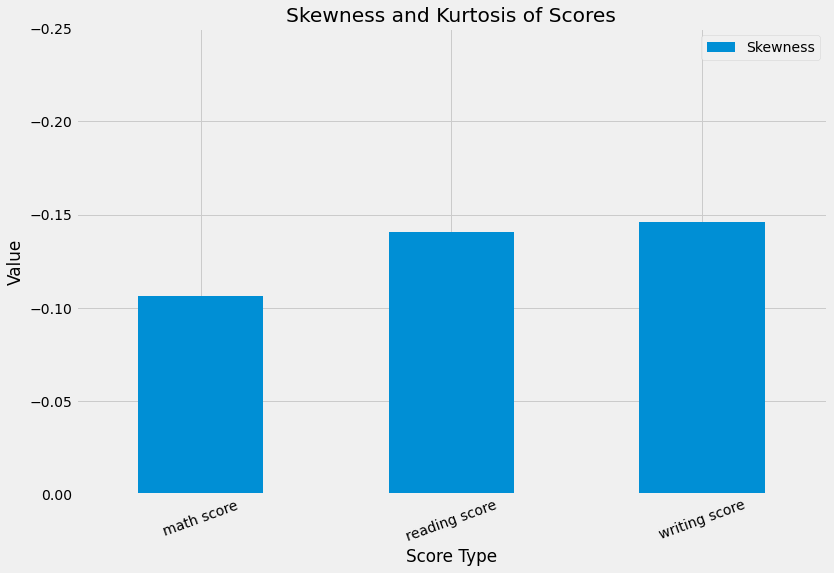

In [27]:
# Skewness, Kurtosis: Calculate the measures of shape to describe the symmetry and peakedness of the distribution of the data

# Do it for the test scores only

from scipy.stats import skew, kurtosis

def cal_skew_kuto(data):
    skewness=data.apply(skew)
    kurt=data.apply(kurtosis)
    results = pd.DataFrame({'Skewness':skewness, 'Kurtosis':kurtosis})
    return results

# use the function per column
cal_skew_kuto(df[['math score', 'reading score','writing score']])

# Plot \
fig, ax = plt.subplots(figsize=(12,8))
cal_skew_kuto(df[['math score', 'reading score','writing score']]).plot(kind='bar', ax=ax, ylim=[0, -0.25])
ax.set_title('Skewness and Kurtosis of Scores')
ax.set_xlabel('Score Type')
ax.set_ylabel('Value')
plt.xticks(rotation=20)
plt.show()

In [28]:
# Create a new column that only takes individuals who have a passing grade of over 50
df_dumb['pass/fail'] = df_dumb[['math score', 'reading score', 'writing score']].apply(lambda x: 'Fail' if (x >= 50).all() else 'Pass',axis=1)
dfpress = pd.get_dummies(df_dumb['pass/fail'])
df_dumb = pd.concat([df_dumb, dfpress],axis=1)
df_dumb.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,...,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,pass/fail,Fail,Pass
0,72,72,74,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,Fail,1,0
1,69,90,88,1,0,0,0,1,0,0,...,0,1,0,0,1,1,0,Fail,1,0
2,90,95,93,1,0,0,1,0,0,0,...,1,0,0,0,1,0,1,Fail,1,0
3,47,57,44,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,Pass,0,1
4,76,78,75,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,Fail,1,0


In [69]:
df_dumb.drop(['Fail'],axis=1, inplace=True)

In [70]:
df_dumb.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,...,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,Pass
0,72,72,74,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,69,90,88,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
2,90,95,93,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,47,57,44,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,76,78,75,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


# Machine Learning 

In [104]:
# Logistic regression: Can it predict the performance of the individual based on the attributes of the person. 
# will it know if it passes or not

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Our target values are our Pass columns, we can remove the gender column because they don't have a dramatic effect on our data 
X_train, X_test, y_train, y_test = train_test_split(df_dumb.drop(['Pass', 'gender_male', 'gender_female', 'math score', 'reading score', 'writing score'], axis=1), df_dumb['Pass'], test_size=0.33, random_state=42)

# Train the data
lm = LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

# Metrics

In [105]:
prediction = lm.predict(X_test)

print('accuracy score:', accuracy_score(y_test, prediction))
print('classification report:', classification_report(y_test, prediction))
print('confusion matrix:', confusion_matrix(y_test, prediction))

accuracy score: 0.793939393939394
classification report:               precision    recall  f1-score   support

           0       0.80      0.98      0.88       260
           1       0.60      0.09      0.15        70

    accuracy                           0.79       330
   macro avg       0.70      0.54      0.52       330
weighted avg       0.76      0.79      0.73       330

confusion matrix: [[256   4]
 [ 64   6]]


# Testing Model With A New Student

Let's try out our model by feeding it a new students performance

In [106]:
X_test.columns

Index(['race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [126]:
# Information on the new student

student= {'race/ethnicity_group A': 1, 'race/ethnicity_group B':0,
       'race/ethnicity_group C':0, 'race/ethnicity_group D':0,
       'race/ethnicity_group E':0,
       "parental level of education_associate's degree":0,
       "parental level of education_bachelor's degree":0,
       "parental level of education_high school":0,
       "parental level of education_master's degree":0,
       'parental level of education_some college':1,
       'parental level of education_some high school':0, 'lunch_free/reduced': 0,
       'lunch_standard':1, 'test preparation course_completed':1,
       'test preparation course_none':0}

# Convert the dictionary to a dataframe like how we formatted our training set/testing set. Then we'll predict whether they passed or not. 
student = pd.DataFrame(student, index=[0])

In [135]:
student_predict= lm.predict(student)

if student_predict[0]==0:
    print('Student Performance: Failed')
else: 
    print('Student Performance: Passed')

Student Performance: Failed


Therefore, the model predicts that the student failed on their overall performance based their previous attributes or what they did before the test.

# Conclusion 

After analyzing the student performance dataset, we can conclude that several factors have a significant impact on a student's academic success. The most important predictors of a student's academic performance are their parental level of education, whether they completed a test preparation course, their race/ethnicity and their socioeconomic status as indicated by their lunch type. We found that our logistic regression model had an accuracy score of 0.8, indicating that it is a good predictor of whether a student will pass or fail. The model did not overfit the model, which is important for predictions in the future. 

Overall, this project provides valuable insights into the factors that contribute to a student's academic performance and offers models that can be used to predict a student's success. Except for the student's race, these findings can be used by educators and policymakers to develop targeted interventions and support programs to improve student outcomes. 